Importing the necessary libraries

In [ ]:

import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle   # a pickle is a file in which you've train your model you can export your file as a pickle file and use it to collect data from a server and make predections based on data a user enters


Reading the data from a csv file into a pandas dataframe

In [ ]:
flowers = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/avinashjairam.github.io/master/Iris.csv')

Dropping the ID Column - We don't need it for this exercise.

In [ ]:
flowers.drop(columns=['Id'], inplace=True)

Taking a peek at our dataset


In [ ]:
flowers.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Looking at the shape of our dataset - It has 150 rows and 4 columns




In [ ]:
flowers.shape

(150, 5)

Inspecting what data types are store in the dataframe. It looks like

---

we have 4 columns of floats and 1 column of strings.

In [ ]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Separating the features from the labels

In [ ]:
#Note the use of .vales and
#.values is used to extract the dataframe values to a numpy array
X = flowers[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']].values

In [ ]:
y = flowers[['Species']].values

Splitting the Dataset into Training and Test Sets


In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split() is a method to split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Let's take another look at the dataset. We can see that the sepal length and and petal width values have a considerable difference in size. As a result, the larger values may have more of an impact on our model. Hence, we need to rescale our data.

Feature Scaling - One method to rescale data is to standardize it.

To standardize a dataset means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the model to the training dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Note here we are calling our model 'classifier.' In the titantic example, we called our model lr. This is your choice.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

Performing 5-Fold Cross Validation

In [ ]:
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9523809523809523


Performing Stratified 10-Fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)


Using the model to make predictions on the test dataset

In [ ]:
result = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9636363636363636


In [ ]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

# Getting a set of the Predicted probabilities
probs_y= knn.predict_proba(X_test)

In the cells below we are generating a dataframe showing the actual records, the predicted output from the model and the corresponding probabilities

In [ ]:
#Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[['Setosa(%)', 'versicolor(%)', 'virginica(%)']])

In [ ]:
#Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [ ]:
#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [ ]:
#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In the dataframe below, y_test represents the actual records, y_pred represents the predicted records from the model, and the other columns represented the probabilites of the predictions

In [ ]:
comparison_of_true_pred
#In the table below we can see in row index 0, the model predicted that the flower was a 'virginica' with a ~96% probability

,y_test,y_pred,Setosa(%),versicolor(%),virginica(%)
0,Iris-virginica,Iris-virginica,0.0,0.0,100.0
1,Iris-versicolor,Iris-versicolor,0.0,100.0,0.0
2,Iris-setosa,Iris-setosa,100.0,0.0,0.0
3,Iris-virginica,Iris-virginica,0.0,0.0,100.0
4,Iris-setosa,Iris-setosa,100.0,0.0,0.0
5,Iris-virginica,Iris-virginica,0.0,0.0,100.0
6,Iris-setosa,Iris-setosa,100.0,0.0,0.0
7,Iris-versicolor,Iris-versicolor,0.0,100.0,0.0
8,Iris-versicolor,Iris-versicolor,0.0,80.0,20.0
9,Iris-versicolor,Iris-versicolor,0.0,100.0,0.0


In [ ]:
#generating a confusion matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

Printing the classification report - How does this model compare to that of the titanic dataset?

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



How does the value of accuracy change in relation to K?

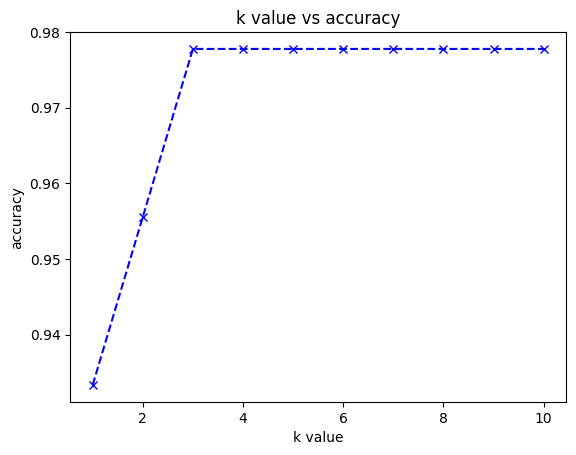

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.ravel())
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred.ravel()))
plt.plot(list(range(1,11)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()

In [ ]:

# Save the trained model and the scaler to files
with open('model.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)


THE LARGER THE K VALUE, THE LARGER AMOUNT OF COMPUTATIONS THERE ARE